# Antarctica Global – Data Analyst Assignment
## Analysis Using Our World in Data: Energy Use & Emissions

Author: Manish Kumar Rajak


## Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Step 2: Load public datasets from Our World in Data

In [3]:
# CO2 emissions dataset
# Download from: https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv
co2_raw = pd.read_csv("owid-co2-data.csv")

# Carbon intensity of electricity
# Download from: https://ourworldindata.org/grapher/carbon-intensity-electricity.csv
intensity_raw = pd.read_csv("carbon-intensity-electricity.csv")

print("CO2 raw shape:", co2_raw.shape)
print("Intensity raw shape:", intensity_raw.shape)

CO2 raw shape: (50407, 79)
Intensity raw shape: (5737, 4)


## Step 3: Exploratory Data Analysis (EDA) – CO₂ Dataset

In [4]:
# Inspect first few rows to understand the basic structure
co2_raw.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check column names, data types, and non-null counts
co2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50407 non-null  object 
 1   year                                       50407 non-null  int64  
 2   iso_code                                   42480 non-null  object 
 3   population                                 41167 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 29173 non-null  float64
 6   cement_co2_per_capita                      25648 non-null  float64
 7   co2                                        29384 non-null  float64
 8   co2_growth_abs                             27216 non-null  float64
 9   co2_growth_prct                            26239 non-null  float64
 10  co2_including_luc     

In [6]:
# Summary statistics for numeric columns
co2_raw.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50407.000000,4.116700e+04,1.525100e+04,29173.000000,25648.000000,29384.000000,27216.000000,26239.000000,23796.000000,23496.000000,...,2170.000000,41001.000000,38060.000000,41001.000000,41001.000000,38060.000000,37410.000000,37236.000000,4712.000000,4712.000000
mean,1920.341024,6.017453e+07,3.300495e+11,7.890109,0.060013,420.227035,6.268847,42.598225,544.144592,7.483698,...,7.190616,2.269285,0.003026,0.007670,0.011023,0.000509,488.542225,316.133529,-6.986781,21.468641
std,65.855263,3.308433e+08,3.086383e+12,62.988171,0.123562,1972.092032,62.199548,1721.913018,2273.281696,99.512520,...,17.448980,9.316505,0.016519,0.043701,0.061905,0.003043,2392.602014,1839.609891,259.018184,62.637598
min,1750.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1928.339000,-100.000000,-84.560000,-2298.978000,...,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2177.807000,-98.281000
25%,1875.000000,3.272140e+05,7.874038e+09,0.000000,0.000000,0.381000,-0.005000,-1.070500,6.667750,-0.727500,...,0.144000,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-2.262250,-6.828750
50%,1925.000000,2.291594e+06,2.743861e+10,0.000000,0.001000,5.081000,0.044000,3.813000,28.120000,0.112000,...,0.588500,0.078000,0.000000,0.000000,0.000000,0.000000,15.007500,2.371000,1.641000,8.381500
75%,1975.000000,9.986553e+06,1.212627e+11,0.524000,0.076250,53.656500,1.018000,10.884000,124.303250,2.765250,...,2.416500,0.359000,0.001000,0.001000,0.001000,0.000000,78.242750,29.337500,11.425500,32.782250
max,2024.000000,8.161973e+09,1.301126e+14,1666.885000,2.484000,38598.578000,1804.657000,180870.000000,43184.086000,2614.874000,...,100.000000,100.000000,0.422000,1.161000,1.668000,0.085000,53816.852000,44114.785000,1768.846000,1023.042000


In [7]:
# Check missing values per column (top 10)
co2_raw.isnull().sum().sort_values(ascending=False).head(10)

share_global_cumulative_other_co2    48237
share_global_other_co2               48237
other_co2_per_capita                 47748
cumulative_other_co2                 47153
other_industry_co2                   47153
consumption_co2_per_gdp              45959
consumption_co2_per_capita           45764
trade_co2                            45695
trade_co2_share                      45695
consumption_co2                      45354
dtype: int64

In [8]:
# Check if there are any fully duplicated rows
co2_raw.duplicated().sum()

np.int64(0)

## Step 4: Create Clean Subset – World-Level CO₂ Data

In [9]:
# Filter for global "World" data and keep only year + total CO2 emissions
co2_world = co2_raw[co2_raw["country"] == "World"][["year", "co2"]]

# Remove rows with missing CO2 values
co2_world = co2_world.dropna(subset=["co2"])

# Focus on recent history (from 1990 onwards)
co2_world = co2_world[co2_world["year"] >= 1990]

# Reset index after filtering
co2_world = co2_world.reset_index(drop=True)

# Convert emissions from MtCO2 (million tonnes) to ktCO2 (thousand tonnes)
co2_world["co2_kt"] = co2_world["co2"] * 1000

print("Cleaned World CO2 data (first 5 rows):")
print(co2_world.head(), "\n")

print("World CO2 subset summary:")
print(co2_world.describe(), "\n")

print("Missing values in World CO2 subset:")
print(co2_world.isnull().sum())

Cleaned World CO2 data (first 5 rows):
   year        co2      co2_kt
0  1990  22732.145  22732145.0
1  1991  23205.592  23205592.0
2  1992  22520.424  22520424.0
3  1993  22749.873  22749873.0
4  1994  22974.598  22974598.0 

World CO2 subset summary:
              year           co2        co2_kt
count    35.000000     35.000000  3.500000e+01
mean   2007.000000  30421.858257  3.042186e+07
std      10.246951   5580.350241  5.580350e+06
min    1990.000000  22520.424000  2.252042e+07
25%    1998.500000  24609.046500  2.460905e+07
50%    2007.000000  31499.256000  3.149926e+07
75%    2015.500000  35398.179500  3.539818e+07
max    2024.000000  38598.578000  3.859858e+07 

Missing values in World CO2 subset:
year      0
co2       0
co2_kt    0
dtype: int64


## Step 5: Visualization 1 – Global CO₂ Trend (World)

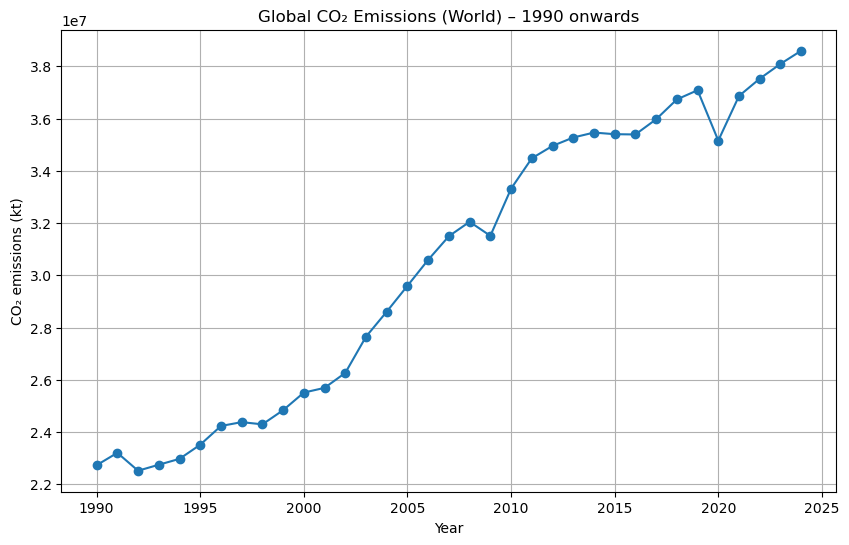

In [10]:
# Plot historical trend of global CO2 emissions (World, 1990 onwards)

plt.figure(figsize=(10, 6))
plt.plot(co2_world["year"], co2_world["co2_kt"], marker="o")

plt.title("Global CO₂ Emissions (World) – 1990 onwards")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (kt)")
plt.grid(True)

plt.show()

### Insights
- ### Emissions have steadily increased since 1990.  
- ### Only small temporary dips occur but overall growth persists.  
- ### Fossil fuel dependence continues to dominate global energy use.  

## Step 6: 5-Year Projection Using Linear Regression

In [11]:
# Use the most recent 20 years to fit a simple linear regression model
max_year = co2_world["year"].max()
recent = co2_world[co2_world["year"] >= max_year - 20]

X = recent[["year"]]      # feature (2D array)
y = recent["co2_kt"]      # target (1D series)

print("Recent years used for projection:")
print(recent.tail())

Recent years used for projection:
    year        co2      co2_kt
30  2020  35158.230  35158230.0
31  2021  36866.863  36866863.0
32  2022  37527.773  37527773.0
33  2023  38094.039  38094039.0
34  2024  38598.578  38598578.0


In [12]:
# Fit LinearRegression model on recent trend
model = LinearRegression()
model.fit(X, y)

print("Model coefficient (slope):", model.coef_[0])
print("Model intercept:", model.intercept_)

Model coefficient (slope): 435137.4454545453
Model intercept: -841881292.0025971


In [13]:
# Generate predictions for the next 5 years
future_years = np.arange(max_year + 1, max_year + 6)
future_years_reshaped = future_years.reshape(-1, 1)

future_preds = model.predict(future_years_reshaped)

# Build a DataFrame with projected values
projection_df = pd.DataFrame({
    "year": future_years,
    "co2_kt_pred": future_preds
})

print("Next 5-year CO₂ projections (kt):")
print(projection_df)

Next 5-year CO₂ projections (kt):
   year   co2_kt_pred
0  2025  3.927204e+07
1  2026  3.970717e+07
2  2027  4.014231e+07
3  2028  4.057745e+07
4  2029  4.101258e+07


C:\Manish\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Step 7: Visualization 2 – Historical vs Projected CO₂ Emissions

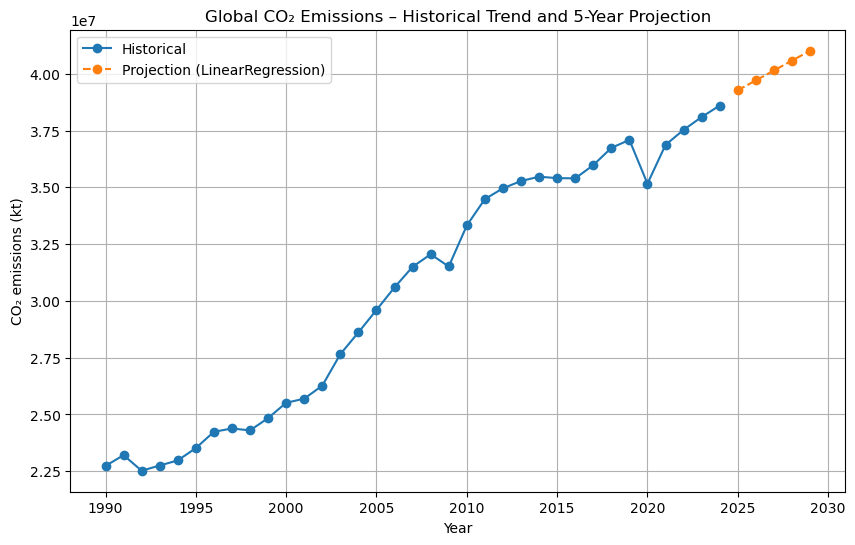

In [14]:
# Plot both historical data and 5-year linear regression projection

plt.figure(figsize=(10, 6))

# Historical series
plt.plot(co2_world["year"], co2_world["co2_kt"], marker="o", label="Historical")

# Projected series
plt.plot(projection_df["year"], projection_df["co2_kt_pred"],
         marker="o", linestyle="--", label="Projection (LinearRegression)")

plt.title("Global CO₂ Emissions – Historical Trend and 5-Year Projection")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (kt)")
plt.legend()
plt.grid(True)

plt.show()

### Insights
- ### LinearRegression shows emissions rising further in the next 5 years.  
- ### No evidence of stabilization in the near term.  
- ### Global decarbonization rate is insufficient to reverse the trend.

## Step 8: Exploratory Data Analysis – Electricity Carbon Intensity

In [15]:
# Inspect first few rows of the carbon-intensity dataset
intensity_raw.head()

,Entity,Code,Year,Carbon intensity of electricity - gCO2/kWh
0,ASEAN (Ember),NaN,2000,572.85864
1,ASEAN (Ember),NaN,2001,570.60640
2,ASEAN (Ember),NaN,2002,573.02800
3,ASEAN (Ember),NaN,2003,577.33940
4,ASEAN (Ember),NaN,2004,583.91736


In [16]:
# Check structure and data types of the intensity dataset
intensity_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      5737 non-null   object 
 1   Code                                        5174 non-null   object 
 2   Year                                        5737 non-null   int64  
 3   Carbon intensity of electricity - gCO2/kWh  5737 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 179.4+ KB


In [17]:
# Summary statistics for numeric columns
intensity_raw.describe()

,Year,Carbon intensity of electricity - gCO2/kWh
count,5737.000000,5737.000000
mean,2011.649817,478.946856
std,7.009501,240.820957
min,2000.000000,0.000000
25%,2006.000000,298.930150
50%,2012.000000,527.748900
75%,2018.000000,650.187560
max,2024.000000,1306.722800


In [18]:
# Check missing values (top 10 columns)
intensity_raw.isnull().sum().sort_values(ascending=False).head(10)

Code                                          563
Entity                                          0
Year                                            0
Carbon intensity of electricity - gCO2/kWh      0
dtype: int64

In [19]:
# Check duplicate rows in intensity dataset
intensity_raw.duplicated().sum()

np.int64(0)

In [20]:
# Check duplicate rows in intensity dataset
intensity_raw.duplicated().sum()

np.int64(0)

## Step 9: Prepare Regional Carbon Intensity Data (World, US, EU, India)

In [21]:
# Rename columns to simpler names for easier handling
intensity = intensity_raw.rename(
    columns={
        "Entity": "entity",
        "Year": "year",
        "Carbon intensity of electricity - gCO2/kWh": "intensity_gco2_per_kwh"
    }
)

# Focus on key regions relevant for cloud/data center workloads
regions = ["World", "United States", "European Union (27)", "India"]

# Filter selected regions
intensity_reg = intensity[intensity["entity"].isin(regions)]

# Drop rows where intensity metric is missing
intensity_reg = intensity_reg.dropna(subset=["intensity_gco2_per_kwh"])

# Reset index after filtering
intensity_reg = intensity_reg.reset_index(drop=True)

print("Selected regions – intensity data (first 10 rows):")
print(intensity_reg.head(10), "\n")

print("Missing values in selected regions subset:")
print(intensity_reg.isnull().sum())

Selected regions – intensity data (first 10 rows):
                entity Code  year  intensity_gco2_per_kwh
0  European Union (27)  NaN  2000               419.09560
1  European Union (27)  NaN  2001               409.16150
2  European Union (27)  NaN  2002               419.65817
3  European Union (27)  NaN  2003               424.24070
4  European Union (27)  NaN  2004               412.04453
5  European Union (27)  NaN  2005               409.94046
6  European Union (27)  NaN  2006               408.72290
7  European Union (27)  NaN  2007               413.10452
8  European Union (27)  NaN  2008               392.42636
9  European Union (27)  NaN  2009               382.45203 

Missing values in selected regions subset:
entity                     0
Code                      24
year                       0
intensity_gco2_per_kwh     0
dtype: int64


## Step 10: Visualization 3 – Regional Carbon Intensity (Latest Year)

Latest year in intensity data: 2024
           entity      Code  year  intensity_gco2_per_kwh
48          India       IND  2024                708.3216
73  United States       USA  2024                383.5492
98          World  OWID_WRL  2024                473.0065


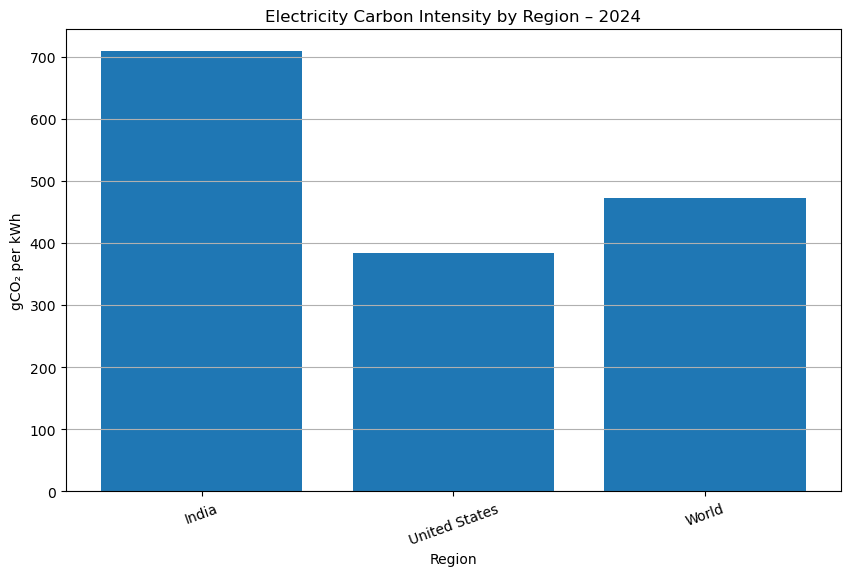

In [22]:
# Compare carbon intensity across regions in the latest available year

latest_year_intensity = intensity_reg["year"].max()
intensity_latest = intensity_reg[intensity_reg["year"] == latest_year_intensity]

print(f"Latest year in intensity data: {latest_year_intensity}")
print(intensity_latest)

plt.figure(figsize=(10, 6))
plt.bar(intensity_latest["entity"], intensity_latest["intensity_gco2_per_kwh"])

plt.title(f"Electricity Carbon Intensity by Region – {latest_year_intensity}")
plt.xlabel("Region")
plt.ylabel("gCO₂ per kWh")
plt.xticks(rotation=20)
plt.grid(True, axis="y")

plt.show()

### Insights
- ### India has the highest carbon intensity (~708 gCO₂/kWh).
- ### The US grid is much cleaner (~383 gCO₂/kWh).
- ### Region choice significantly impacts cloud workload emissions.

## Step 11: Visualization 4 – Top 5 CO₂ Emitting Countries (Latest Year)

Top 5 CO₂ emitting countries in 2024:
             country        co2
9933           China  12289.037
48003  United States   4904.120
21762          India   3193.478
38311         Russia   1780.524
23812          Japan    961.867


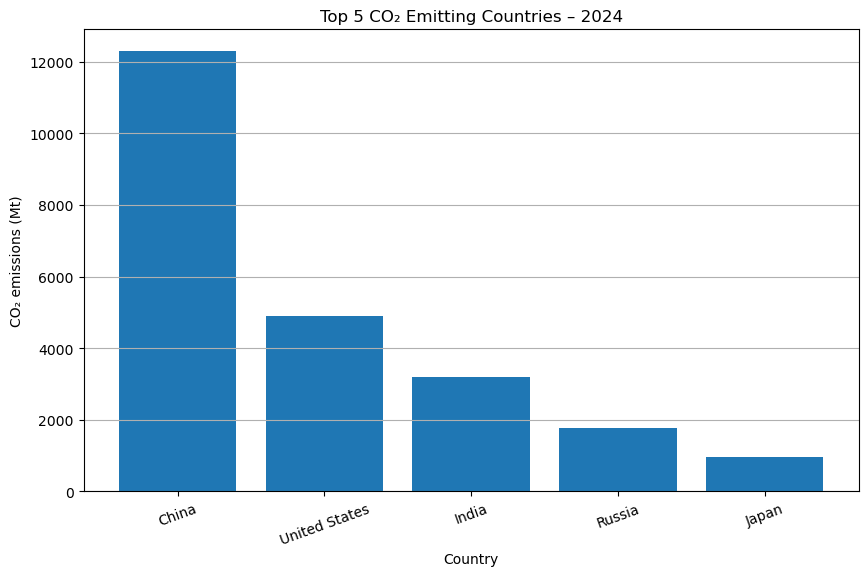

In [23]:
# Identify the latest year in the dataset
latest_year = co2_raw["year"].max()

# Filter rows for the latest year
co2_latest = co2_raw[co2_raw["year"] == latest_year]

# Remove rows where iso_code is missing (non-country aggregates sometimes have blank codes)
co2_latest = co2_latest.dropna(subset=["iso_code"])

# Filter ONLY real countries -> iso_code length exactly 3
co2_countries = co2_latest[co2_latest["iso_code"].str.len() == 3]

# Drop any rows without CO₂ data
co2_countries = co2_countries.dropna(subset=["co2"])

# Select top 5 countries by CO₂ emissions
top5 = co2_countries.nlargest(5, "co2")[["country", "co2"]]

print(f"Top 5 CO₂ emitting countries in {latest_year}:")
print(top5)

# Plot the top 5 emitting countries
plt.figure(figsize=(10, 6))
plt.bar(top5["country"], top5["co2"])

plt.title(f"Top 5 CO₂ Emitting Countries – {latest_year}")
plt.xlabel("Country")
plt.ylabel("CO₂ emissions (Mt)")
plt.xticks(rotation=20)
plt.grid(True, axis="y")

plt.show()

## Insights
- ### China leads global emissions by a large margin (~12,289 Mt).
- ### The United States is the second-highest emitter (~4,904 Mt).
- ### India, Russia, and Japan also contribute significantly to global emissions.

# Strategic Recommendations:

## 1. Prioritize Low-Carbon Cloud Regions
- ### India has very high carbon intensity (708 gCO₂/kWh).  
- ### Run AI workloads in cleaner regions (US/EU).  
- ### Avoid compute-heavy jobs in high-carbon regions.  
- ### Impact: 40–70% lower emissions for the same workload.

### 2. Optimize AI Model Training
- ### Prefer fine-tuning over full model training.  
- ### Use smaller/distilled models when possible.  
- ### Apply pruning, quantization, early stopping.  
- ### Impact: Lower GPU hours, energy use, and cost.

### 3. Choose Cloud Providers with Strong Renewable Energy
- ### Select regions with high renewable penetration.  
- ### Prefer providers offering hourly carbon-free energy.  
- ### Review Google/AWS/Azure sustainability reports.  
- ### Impact: Reduces operational emissions.

### 4. Use Carbon-Aware Scheduling
- ### Run non-urgent tasks during solar/wind peak hours.  
- ### Use APIs for real-time carbon intensity.  
- ### Impact: Lower emissions without changing regions.

### 5. Improve Hardware Lifecycle Efficiency
- ### Extend server/GPU lifespan.  
- ### Reuse/repurpose hardware where possible.  
- ### Optimize cooling systems.  
- ### Impact: Reduces embodied carbon.

### 6. Track IT Carbon Emissions Regularly
- ### Set annual CO₂ budgets for AI & cloud.  
- ### Use dashboards linked with cloud billing.  
- ### Apply FinOps + GreenOps governance.  
- ### Impact: Makes emissions measurable and accountable.
